In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow import keras

## Image Preprocessing

In [3]:
training_set = keras.utils.image_dataset_from_directory(
    'archive/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


## Validation Set

In [4]:
validation_set = keras.utils.image_dataset_from_directory(
    'archive/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[114.25 122.25 111.25]
   [114.75 122.75 111.75]
   [117.25 125.25 114.25]
   ...
   [145.5  151.5  149.5 ]
   [147.   153.   151.  ]
   [144.   150.   148.  ]]

  [[113.5  121.   111.5 ]
   [115.5  123.   113.5 ]
   [115.5  123.   113.5 ]
   ...
   [147.   153.   151.  ]
   [146.75 152.75 150.75]
   [144.   150.   148.  ]]

  [[113.5  120.5  113.5 ]
   [113.5  120.5  113.5 ]
   [115.75 122.75 115.75]
   ...
   [146.75 152.75 150.75]
   [145.75 151.75 149.75]
   [146.   152.   150.  ]]

  ...

  [[116.75 115.75 111.75]
   [121.25 120.25 116.25]
   [125.75 124.75 120.75]
   ...
   [131.5  137.5  135.5 ]
   [131.5  137.5  135.5 ]
   [130.25 136.25 134.25]]

  [[115.75 114.75 110.75]
   [120.75 119.75 115.75]
   [127.   126.   122.  ]
   ...
   [134.75 140.75 138.75]
   [133.75 139.75 137.75]
   [131.   137.   135.  ]]

  [[116.25 115.25 111.25]
   [117.5  116.5  112.5 ]
   [121.   120.   116.  ]
   ...
   [130.   136.   134.  ]
   [132.5  138.5  136.5 ]
   [132.5  138.5  13

## Model Building

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

## Removing Loss Function Overshooting Problem

In the above model, the loss function overshoots in the middle rather than decreasing.
Following steps are taken to reduce Overshooting:
1. Reducing Learning rate to 0.0001 from 0.001 so we do not miss the lowest loss point.
2. Increasing number of neurons in dense layer to 1500 from 1024 coz underfitting could be a problem.
3. Dropping some layers using dropout to avoid overfitting and maintaining a balance between over and underfitting.
4. Adding more conv2D layers as maybe less features are extracted from the image.

Note: Also add remove padding=same from the 2nd convo layers, as padding=same means keep the size of image same as previous, but the above convo layer may have reduced the size of image so it wouldnt consider it.

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(filters=16,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/Users/prasannatupe/Anaconda/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(units=512,activation='relu'))

In [22]:
model.add(Dropout(0.4))

In [23]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))
#softmax used for categorical type problems, it gives probability of each class and we choose highest probability.

### Compiling Better Model

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,247,926 (12.39 MB)

 Trainable params: 3,247,926 (12.39 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [26]:
training_history = model.fit(x=training_set, validation_data = validation_set, batch_size = 64, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 269s 122ms/step - accuracy: 0.4480 - loss: 2.3064 - val_accuracy: 0.8047 - val_loss: 0.6259
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 274s 125ms/step - accuracy: 0.8105 - loss: 0.6135 - val_accuracy: 0.8801 - val_loss: 0.3813
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 277s 126ms/step - accuracy: 0.8787 - loss: 0.3860 - val_accuracy: 0.8791 - val_loss: 0.3862
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 262s 119ms/step - accuracy: 0.9029 - loss: 0.3003 - val_accuracy: 0.9085 - val_loss: 0.2896
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 280s 127ms/step - accuracy: 0.9260 - loss: 0.2323 - val_accuracy: 0.8957 - val_loss: 0.3502
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 274s 125ms/step - accuracy: 0.9372 - loss: 0.1934 - val_accuracy: 0.9144 - val_loss: 0.2922
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 264s 120ms/step - accuracy: 0.9451 - loss: 0.1708 - val_accuracy: 0.8842 - val_loss: 0.4147
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 289s 132ms/step - ac

## Model Evaluation

In [27]:
#Model Evaluation on Training Set
train_loss, train_accuracy = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 76s 35ms/step - accuracy: 0.9898 - loss: 0.0313


In [28]:
print(train_loss, train_accuracy)

0.026545338332653046 0.9914929866790771


In [29]:
#Model Evaluation on Validation Set
valid_loss, valid_accuracy = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.9117 - loss: 0.3486


In [30]:
print(valid_loss,valid_accuracy)

0.35254666209220886 0.9115638732910156


## Saving Model

In [31]:
model.save("trained_model.h5")

In [32]:
model.save("trained_model.keras")

In [33]:
training_history.history

{'accuracy': [0.6156056523323059,
  0.8305853605270386,
  0.8849847316741943,
  0.9122412800788879,
  0.9290703535079956,
  0.9404509663581848,
  0.9463404417037964,
  0.9527135491371155,
  0.956867516040802,
  0.9606373310089111],
 'loss': [1.37363862991333,
  0.5447047352790833,
  0.35914865136146545,
  0.27220407128334045,
  0.2179766744375229,
  0.18383027613162994,
  0.16569817066192627,
  0.14451424777507782,
  0.13449959456920624,
  0.12528827786445618],
 'val_accuracy': [0.8046892881393433,
  0.8800933361053467,
  0.8791258931159973,
  0.9085476994514465,
  0.8956863284111023,
  0.9143523573875427,
  0.8841907382011414,
  0.9195310473442078,
  0.9141247272491455,
  0.9115638732910156],
 'val_loss': [0.6259182095527649,
  0.3813144266605377,
  0.38620641827583313,
  0.28959476947784424,
  0.35015302896499634,
  0.29219749569892883,
  0.41469606757164,
  0.29880058765411377,
  0.32958462834358215,
  0.35254624485969543]}

In [34]:
#Saving history in json
import json
with open("training_history.json","w") as f:
    json.dump(training_history.history,f)

### Accuracy Visualisation

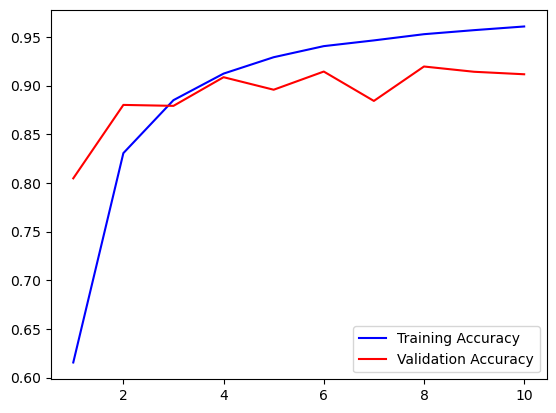

In [37]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='blue',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='red',label='Validation Accuracy')
plt.legend(loc=4)